In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("2013GIPUZKOARENDIMIENTOS.csv",sep=";",encoding='latin-1')

In [3]:
df.shape



(46, 19)

In [4]:
df.head(5)

,HERRIA,1.VOLUMEN_ALTA_M3,1.VOLUMEN_BAJA_M3,1.RENDIMIENTO,2.VOLUMEN_ALTA_M3,2.VOLUMEN_BAJA_M3,2.RENDIMIENTO,3.VOLUMEN_ALTA_M3,3.VOLUMEN_BAJA_M3,3.RENDIMIENTO,4.VOLUMEN_ALTA_M3,4.VOLUMEN_BAJA_M3,4.RENDIMIENTO,VOLUMEN_ALTA_TOTAL,VOLUMEN_BAJA_TOTAL,REND. ANUAL,PRDIDA AGUA_M3 / MES,VOLUMEN PROMEDIO ALTA TRIMESTRE,VOLUMEN PROMEDIO BAJA TRIMESTRE
0,Abaltzisketa,8.120,4.448,"0,55",7.488,4.493,"0,60",8.888,4.976,"0,56",7.185,4.309,"0,60",31.681,18.226,"0,58",1.121,7.920,4.557
1,Aia,34.903,29.513,"0,85",35.708,33.246,"0,93",45.062,35.993,"0,80",40.866,29.408,"0,72",156.539,128.160,"0,82",2.365,39.135,32.040
2,Alegia,48.114,25.351,"0,53",35.444,23.437,"0,66",40.481,23.302,"0,58",40.344,23.378,"0,58",164.383,95.468,"0,58",5.743,41.096,23.867
3,Altzo,6.418,4.152,"0,65",6.098,3.992,"0,65",7.301,4.856,"0,67",7.795,4.396,"0,56",27.612,17.396,"0,63",851.000,6.903,4.349
4,Anoeta,33.609,21.262,"0,63",31.236,22.969,"0,74",29.741,21.512,"0,72",33.713,21.715,"0,64",128.299,87.459,"0,68",3.403,32.075,21.865


In [5]:
df.dtypes


HERRIA                              object
1.VOLUMEN_ALTA_M3                   object
1.VOLUMEN_BAJA_M3                   object
1.RENDIMIENTO                       object
2.VOLUMEN_ALTA_M3                   object
2.VOLUMEN_BAJA_M3                   object
2.RENDIMIENTO                       object
3.VOLUMEN_ALTA_M3                   object
3.VOLUMEN_BAJA_M3                   object
3.RENDIMIENTO                       object
4.VOLUMEN_ALTA_M3                   object
4.VOLUMEN_BAJA_M3                   object
4.RENDIMIENTO                       object
VOLUMEN_ALTA_TOTAL                  object
VOLUMEN_BAJA_TOTAL                  object
REND. ANUAL                         object
PRDIDA AGUA_M3 / MES              float64
VOLUMEN PROMEDIO ALTA TRIMESTRE     object
VOLUMEN PROMEDIO BAJA TRIMESTRE     object
dtype: object

In [6]:
df.columns


Index(['HERRIA', '1.VOLUMEN_ALTA_M3', '1.VOLUMEN_BAJA_M3', '1.RENDIMIENTO',
       '2.VOLUMEN_ALTA_M3', '2.VOLUMEN_BAJA_M3', '2.RENDIMIENTO',
       '3.VOLUMEN_ALTA_M3', '3.VOLUMEN_BAJA_M3', '3.RENDIMIENTO',
       '4.VOLUMEN_ALTA_M3', '4.VOLUMEN_BAJA_M3', '4.RENDIMIENTO',
       'VOLUMEN_ALTA_TOTAL', 'VOLUMEN_BAJA_TOTAL', 'REND. ANUAL',
       'PRDIDA AGUA_M3 / MES', 'VOLUMEN PROMEDIO ALTA TRIMESTRE',
       'VOLUMEN PROMEDIO BAJA TRIMESTRE'],
      dtype='object')

In [7]:
df.isna().any()


HERRIA                             False
1.VOLUMEN_ALTA_M3                  False
1.VOLUMEN_BAJA_M3                  False
1.RENDIMIENTO                      False
2.VOLUMEN_ALTA_M3                  False
2.VOLUMEN_BAJA_M3                  False
2.RENDIMIENTO                      False
3.VOLUMEN_ALTA_M3                  False
3.VOLUMEN_BAJA_M3                  False
3.RENDIMIENTO                      False
4.VOLUMEN_ALTA_M3                  False
4.VOLUMEN_BAJA_M3                  False
4.RENDIMIENTO                      False
VOLUMEN_ALTA_TOTAL                 False
VOLUMEN_BAJA_TOTAL                 False
REND. ANUAL                        False
PRDIDA AGUA_M3 / MES              False
VOLUMEN PROMEDIO ALTA TRIMESTRE    False
VOLUMEN PROMEDIO BAJA TRIMESTRE    False
dtype: bool

In [8]:
description= df.describe().T

Data cleaning

In [9]:
df = df.rename(columns={'PRDIDA AGUA_M3 / MES': 'PERDIDA AGUA M3 / MES'})

df['PERDIDA AGUA M3 / MES'] = df['PERDIDA AGUA M3 / MES'].astype(int)


In [10]:
df = df.replace('\.', '', regex=True)
df = df.replace('\,', '.', regex=True)

In [11]:
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

In [12]:
#We can delete last file
df1= df.iloc[:-1,:]
#Set up Herria as Index
df1 = df1.set_index("HERRIA")  


In [13]:
df1_vol_alta= df1.iloc[:,[0,3,6,9]]
df1_vol_baja= df1.iloc[:,[1,4,7,10]]
df1_rend= df1.iloc[:,[2,5,8,11]]

Compare Volumen alta vs Volumen baja per trimestre


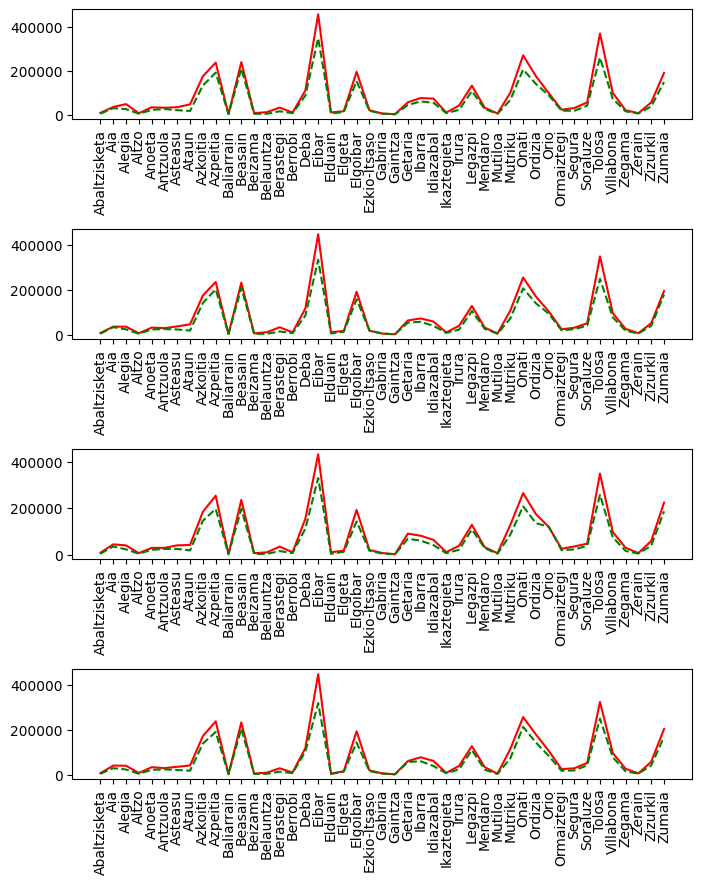

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(8, 10))  
fig.subplots_adjust(hspace=1)  

ax[0].plot(df1["1.VOLUMEN_ALTA_M3"], 'r-')
ax[0].plot(df1["1.VOLUMEN_BAJA_M3"], 'g--')
ax[1].plot(df1["2.VOLUMEN_ALTA_M3"], 'r-')
ax[1].plot(df1["2.VOLUMEN_BAJA_M3"], 'g--')
ax[2].plot(df1["3.VOLUMEN_ALTA_M3"], 'r-')
ax[2].plot(df1["3.VOLUMEN_BAJA_M3"], 'g--')
ax[3].plot(df1["4.VOLUMEN_ALTA_M3"], 'r-')
ax[3].plot(df1["4.VOLUMEN_BAJA_M3"], 'g--')

for a in ax:
    a.tick_params(axis='x', rotation=90)  

plt.show()


VOLUMEN ALTA POR TRIMESTRE

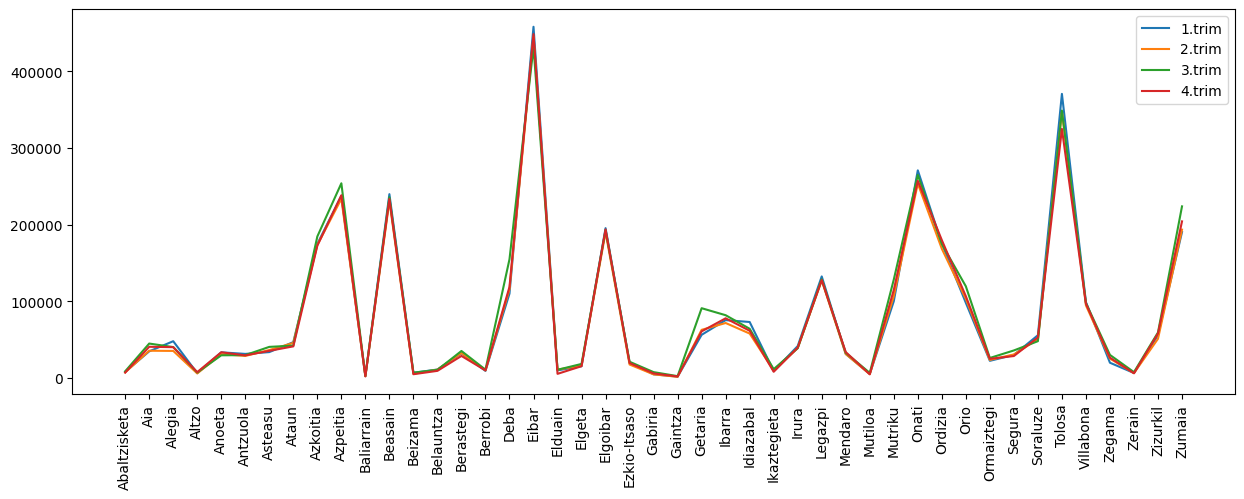

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(df1_vol_alta["1.VOLUMEN_ALTA_M3"], label="1.trim")
plt.plot(df1_vol_alta["2.VOLUMEN_ALTA_M3"], label="2.trim")
plt.plot(df1_vol_alta["3.VOLUMEN_ALTA_M3"], label="3.trim")
plt.plot(df1_vol_alta["4.VOLUMEN_ALTA_M3"], label="4.trim")
plt.xticks(rotation='vertical')
plt.yticks([0, 100000,200000, 300000,400000])  
plt.legend()
plt.show()


VOLUMEN BAJA POR TRIMESTRE

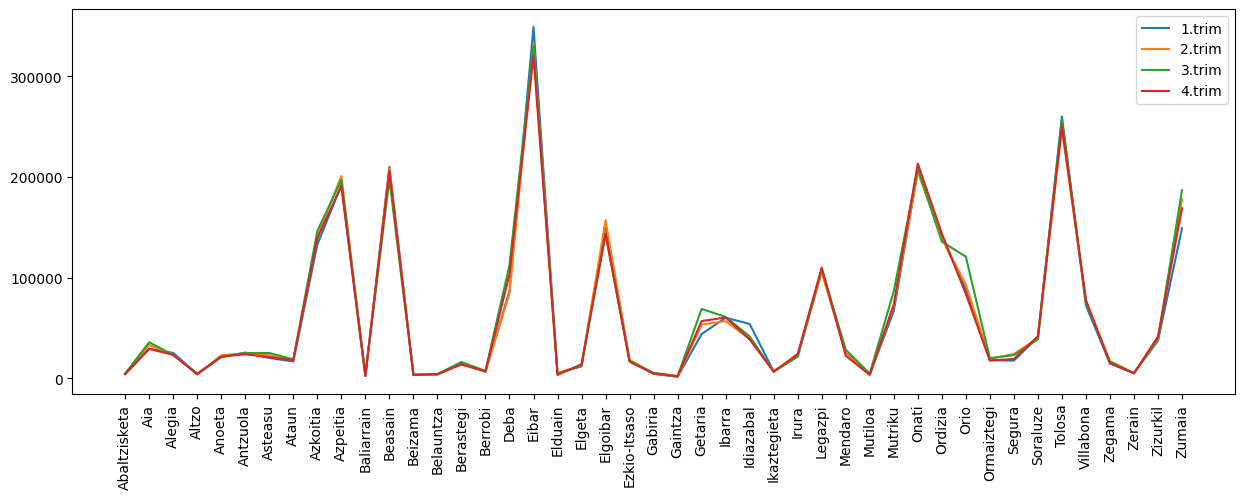

In [16]:

plt.figure(figsize=(15, 5))
plt.plot(df1["1.VOLUMEN_BAJA_M3"], label="1.trim")
plt.plot(df1["2.VOLUMEN_BAJA_M3"], label="2.trim")
plt.plot(df1["3.VOLUMEN_BAJA_M3"], label="3.trim")
plt.plot(df1["4.VOLUMEN_BAJA_M3"], label="4.trim")
plt.xticks(rotation='vertical')
plt.yticks([0,100000,200000, 300000])  
plt.legend()
plt.show()

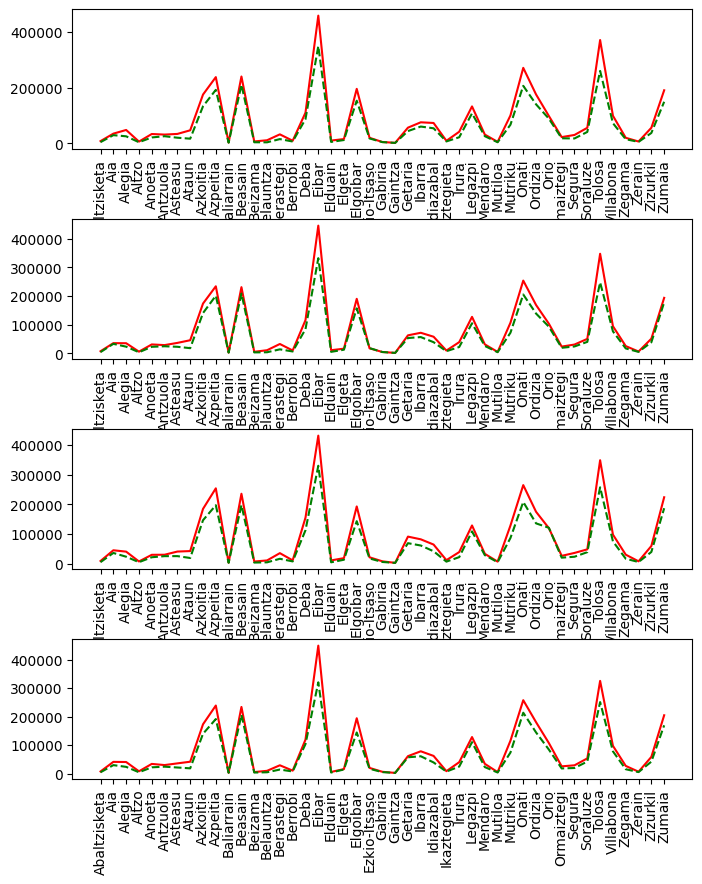

In [17]:
fig, ax = plt.subplots(4, 1, figsize=(8, 10))  
fig.subplots_adjust(hspace=0.5)  

ax[0].plot(df1["1.VOLUMEN_ALTA_M3"], 'r-')
ax[0].plot(df1["1.VOLUMEN_BAJA_M3"], 'g--')
ax[1].plot(df1["2.VOLUMEN_ALTA_M3"], 'r-')
ax[1].plot(df1["2.VOLUMEN_BAJA_M3"], 'g--')
ax[2].plot(df1["3.VOLUMEN_ALTA_M3"], 'r-')
ax[2].plot(df1["3.VOLUMEN_BAJA_M3"], 'g--')
ax[3].plot(df1["4.VOLUMEN_ALTA_M3"], 'r-')
ax[3].plot(df1["4.VOLUMEN_BAJA_M3"], 'g--')

for a in ax:
    a.tick_params(axis='x', rotation=90)  

plt.show()

VOLUMEN PROMEDIO ALTA TRIMESTRE (SORTED)

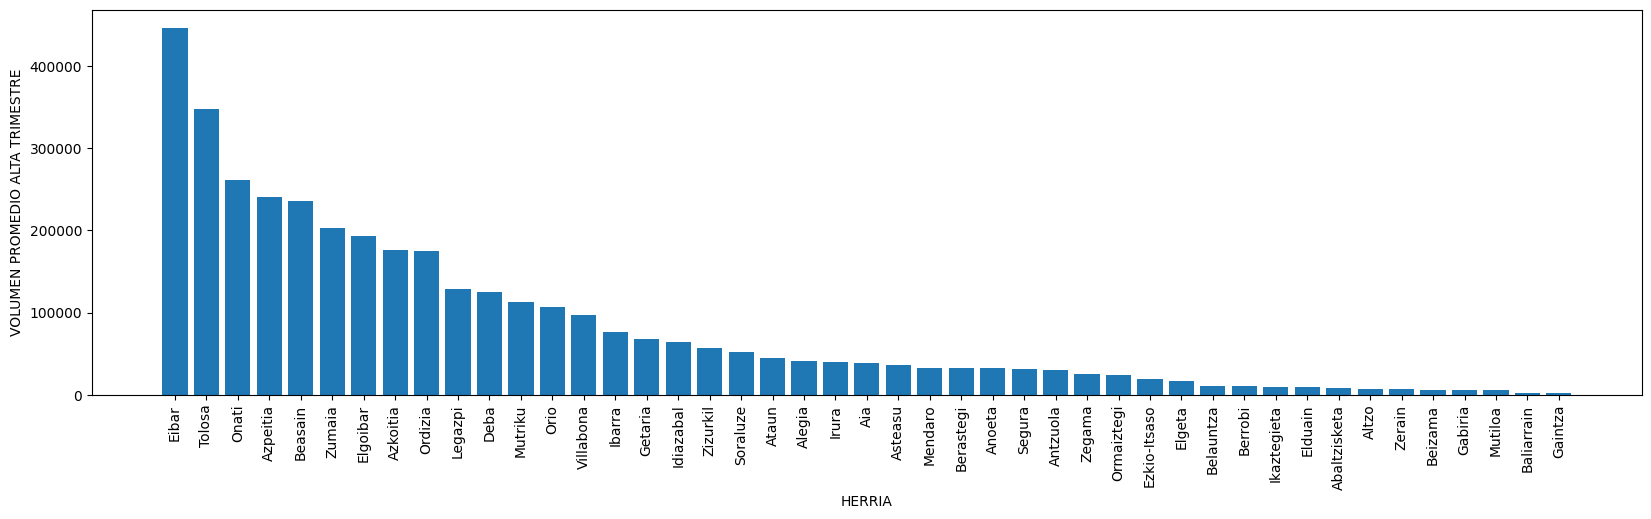

In [18]:
promedio_alta_sorted= df1.sort_values(by='VOLUMEN PROMEDIO ALTA TRIMESTRE', ascending=False)
plt.figure(figsize=(20, 5))
plt.bar(x=promedio_alta_sorted.index, height=promedio_alta_sorted['VOLUMEN PROMEDIO ALTA TRIMESTRE'])
plt.xlabel('HERRIA')
plt.ylabel('VOLUMEN PROMEDIO ALTA TRIMESTRE')
plt.xticks(rotation="vertical")
plt.show()


VOLUMEN PROMEDIO BAJA TRIMESTRE (SORTED)

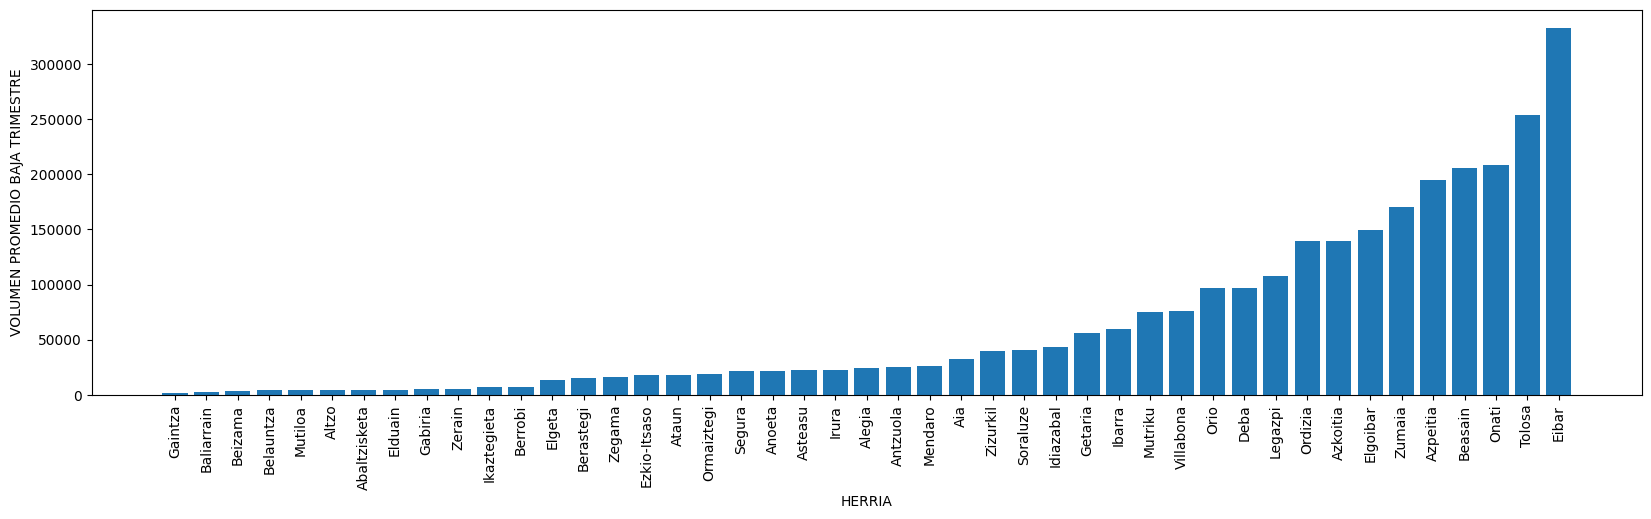

In [19]:
promedio_baja_sorted= df1.sort_values(by='VOLUMEN PROMEDIO BAJA TRIMESTRE', ascending=True)
plt.figure(figsize=(20, 5))
plt.bar(x=promedio_baja_sorted.index, height=promedio_baja_sorted['VOLUMEN PROMEDIO BAJA TRIMESTRE'])
plt.xlabel('HERRIA')
plt.ylabel('VOLUMEN PROMEDIO BAJA TRIMESTRE')
plt.xticks(rotation="vertical")
plt.show()

VOLUMEN PROMEDIO ALTA TRIMESTRE
Swarmplot


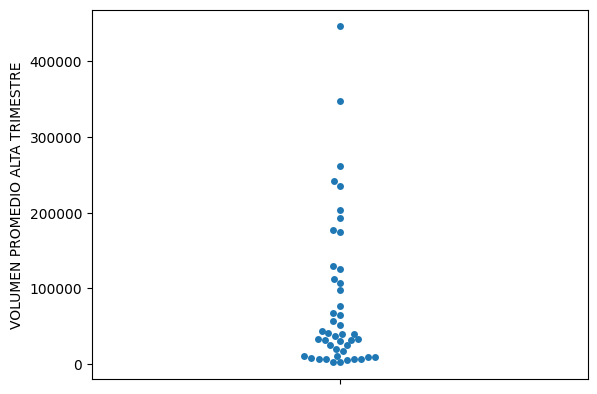

In [20]:
plt.figure()
sns.swarmplot(y='VOLUMEN PROMEDIO ALTA TRIMESTRE', data=df1)
plt.show()


RENDIMIENTO ANUAL PER VILLAGE

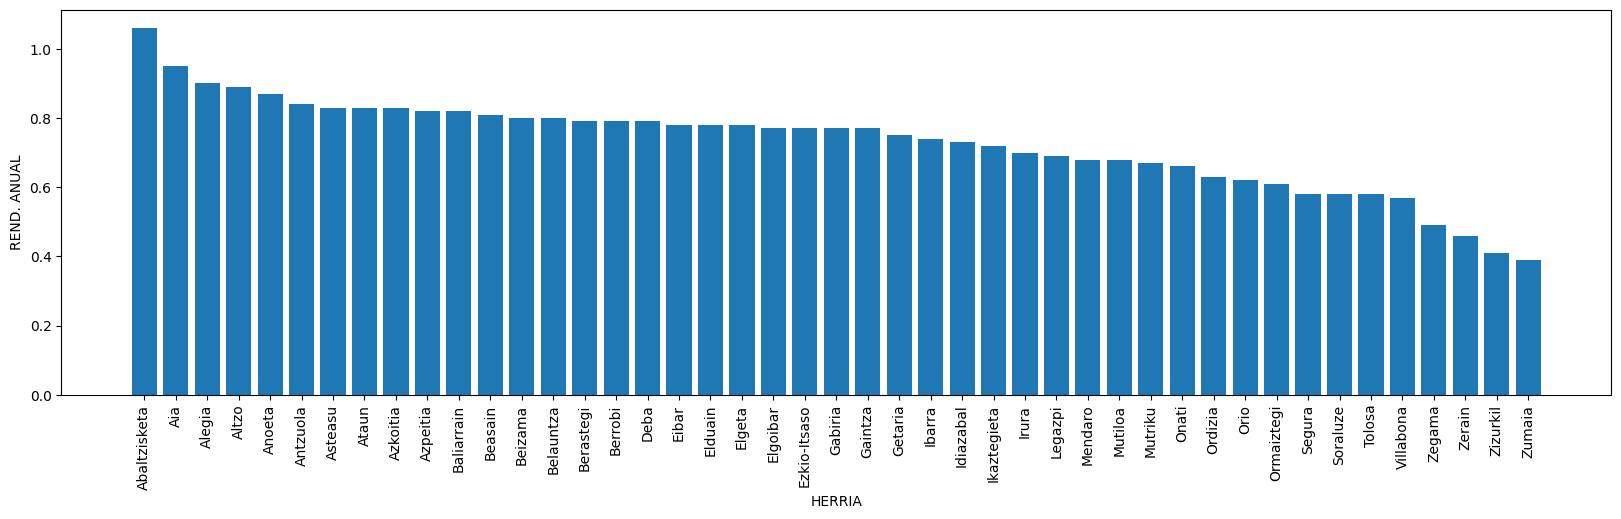

In [21]:
plt.figure(figsize=(20, 5))
plt.bar(x=df1.index, height=df1['REND. ANUAL'].sort_values(ascending=False))
plt.xlabel('HERRIA')
plt.ylabel('REND. ANUAL')
plt.xticks(rotation="vertical")
plt.show()



In [22]:
# Calculate the range of the "Rend. anual" column
range_rend = max(df1['REND. ANUAL']) - min(df1['REND. ANUAL'])
print(range_rend)

0.67


In [23]:
# Calculate the number of unique values in "Rend. anual"
unique_rend_count = df1['REND. ANUAL'].nunique()
print(unique_rend_count)

31


In [24]:
# Print the range divided by the number of unique values
print(range_rend / unique_rend_count)

0.021612903225806453


<Axes: xlabel='REND. ANUAL', ylabel='Count'>

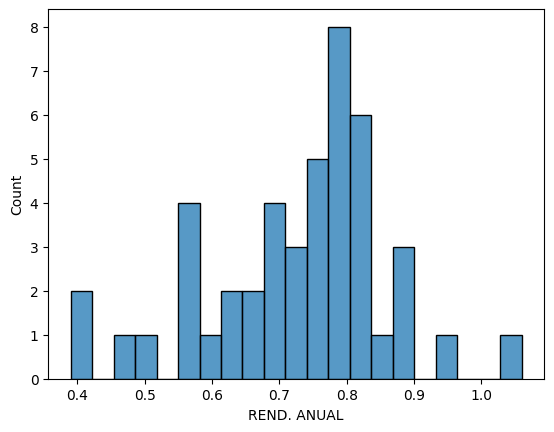

In [25]:
# Create a histogram of the "Rend.anual" column
sns.histplot(data=df1, x='REND. ANUAL', bins=21)

FEATURE ENGINEERING

In [26]:
#getting ready for clustering
dfclust = df1.iloc[:, -2:]

In [27]:
X = dfclust
# Normalize the data
scaler = StandardScaler()
df1_clustnorm = scaler.fit_transform(X)
# Retrieve column names and index from the original DataFrame
column_names = dfclust.columns
index = dfclust.index

# Create a new DataFrame with the normalized data
df1_clustnorm = pd.DataFrame(df1_clustnorm, columns=column_names, index=index)


In [28]:
#Clustering
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
print(clusters)

[712104408896.2222, 172773973297.11108, 87377460958.63635, 38911398838.58867, 28146269506.886906, 20030319283.46131, 10202940902.804167, 5074828966.5256405, 4043035714.9923077, 3105663731.325641]


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

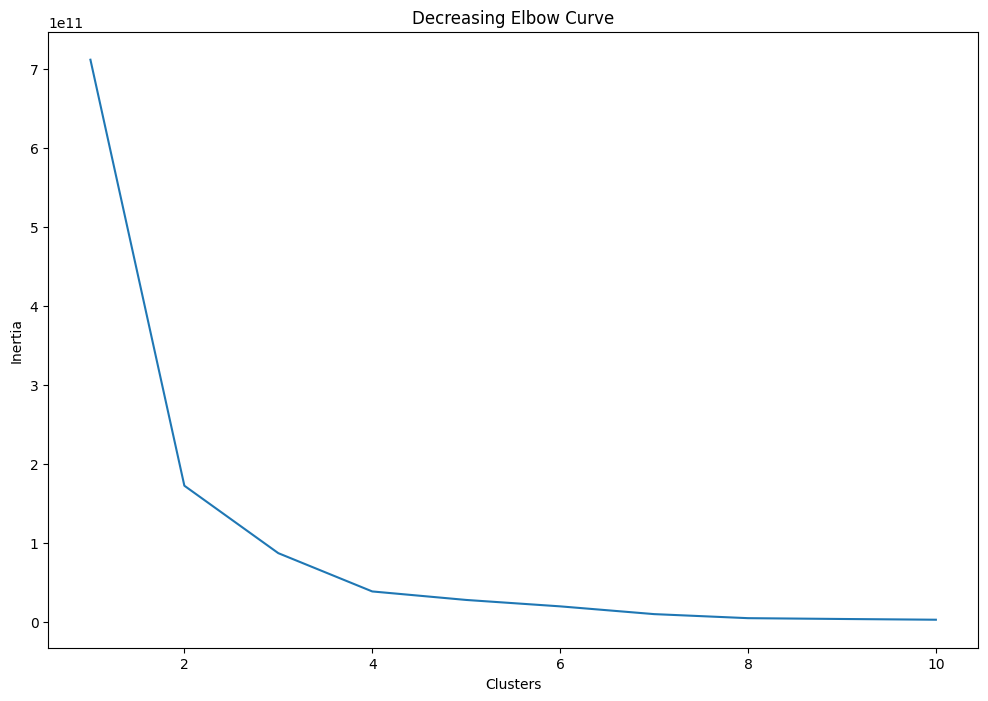

In [29]:
# Plot the elbow curve
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Decreasing Elbow Curve')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [30]:
# Try with 3 clusters
km3 = KMeans(n_clusters=3).fit(X)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
# Assign the labels to the 'Labels' column
dfclust['Labels'] = km3.labels_

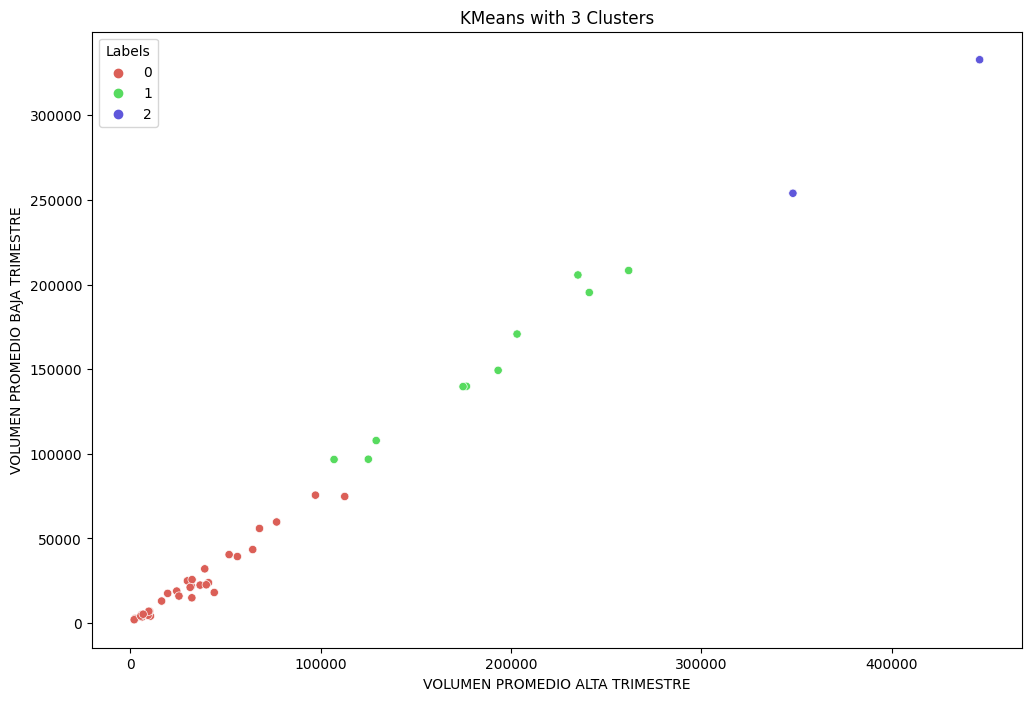

In [32]:
# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dfclust['VOLUMEN PROMEDIO ALTA TRIMESTRE'], y=dfclust['VOLUMEN PROMEDIO BAJA TRIMESTRE'], hue=dfclust['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [33]:
# Let's try with 2 clusters now
km2 = KMeans(n_clusters=2).fit(X)
dfclust['Labels'] = km2.labels_

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


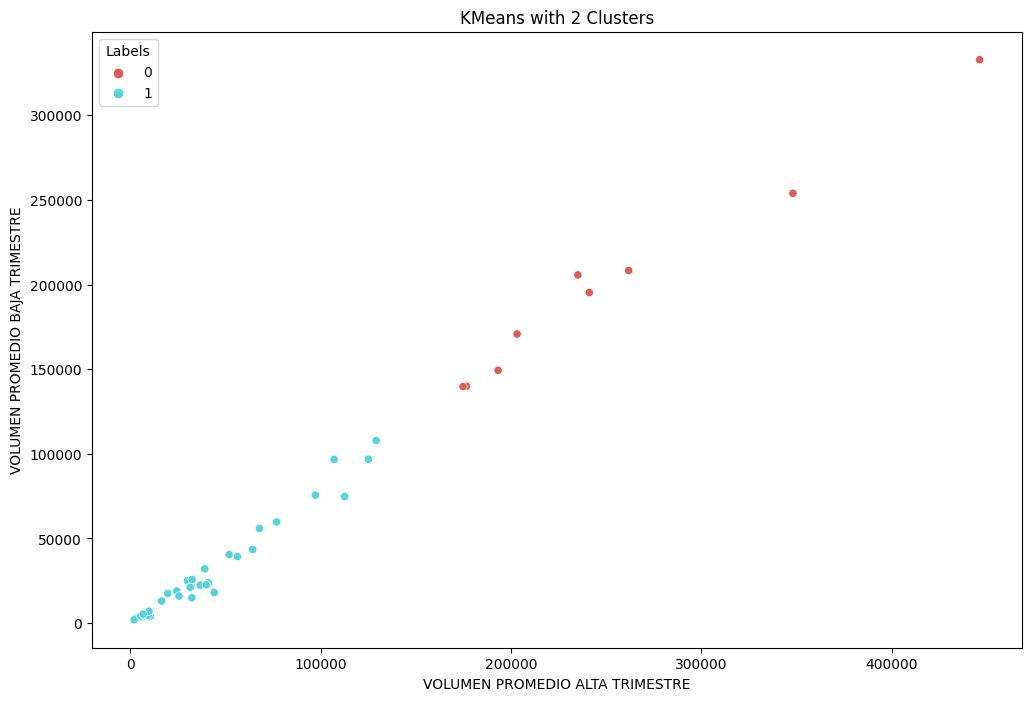

In [34]:
# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dfclust['VOLUMEN PROMEDIO ALTA TRIMESTRE'], y=dfclust['VOLUMEN PROMEDIO BAJA TRIMESTRE'], hue=dfclust['Labels'], palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')
plt.show()